In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [3]:
#Data Load

In [4]:
# df=pd.read_csv("C:\\Users\\shrey\\Downloads\\HR_comma_sep.csv")
df=pd.read_csv("HR_comma_sep.csv")

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

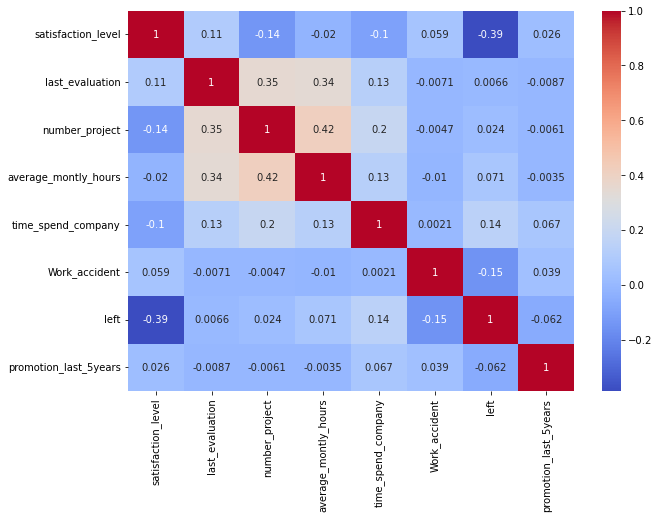

In [8]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show

In [9]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

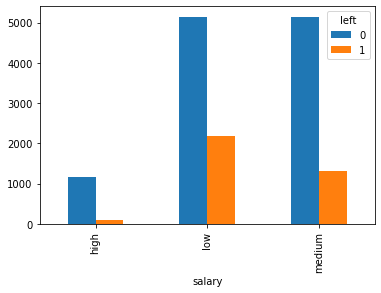

In [11]:
salary_retantion=df.groupby(['salary','left']).size().unstack()
salary_retantion.plot(kind='bar')

<AxesSubplot:xlabel='Department'>

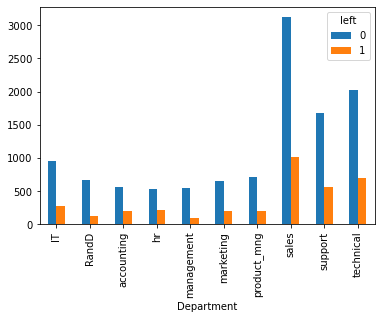

In [12]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [13]:
salary_dummies=pd.get_dummies(df.salary)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [14]:
sub_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [15]:
df_concate=pd.concat([sub_df,salary_dummies],axis='columns')
df_concate

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [16]:
df_concate.drop('salary',axis='columns',inplace=True)

In [17]:
df_concate.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [18]:
X=df_concate

In [19]:
Y=df.left

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [22]:
model.fit(X_train,Y_train)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# satisfaction_level	average_montly_hours	promotion_last_5years	high	low	medium
model.predict([[0.40,234,1,0,1,0]])  #0-Stay 1-Not stay(left)

array([0], dtype=int64)

In [25]:
model.score(X_test,Y_test)   #78% accuracy here 

0.7757777777777778

In [26]:
import joblib

In [27]:
joblib.dump(model,'model_pkl')

['model_pkl']

In [28]:
SL=joblib.load('model_pkl')

In [29]:
SL.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
import os
os.getcwd()

'C:\\Users\\shrey\\OneDrive\\Documents\\ML_Project_Stay_or_left'

In [31]:
import os
os.getcwd()


'C:\\Users\\shrey\\OneDrive\\Documents\\ML_Project_Stay_or_left'